In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [105]:
df_sports_predictions = pd.read_csv("R_nn/nn_outputs/sports_nn_results.csv", index_col=0)
df_athletics_predictions = pd.read_csv("R_nn/nn_outputs/athletics_nn_results.csv", index_col=0)

In [108]:
# weighted f score for whole network
f_score_sport = f1_score(df_sports_predictions["test_labels"],df_sports_predictions["predicted_labels"], average="weighted")
f_score_athletics = f1_score(df_athletics_predictions["test_labels"], df_athletics_predictions["predicted_labels"], average="weighted")

print(f_score_sport)
print(f_score_athletics)

0.36361694146036355
0.45845862639474516


In [109]:
# f score for each class
f_score_sport = f1_score(df_sports_predictions["test_labels"],df_sports_predictions["predicted_labels"], average=None)
labels_sport = np.unique(df_sports_predictions["test_labels"])
f_score_athletics = f1_score(df_athletics_predictions["test_labels"], df_athletics_predictions["predicted_labels"], average=None)
labels_athletics = np.unique(df_athletics_predictions["test_labels"])

print(labels_sport)
print(f_score_sport)
print(labels_athletics)
print(f_score_athletics)

['Cycling' 'Fencing' 'Gymnastics' 'Rowing' 'Swimming']
[0.04756757 0.00296443 0.5094085  0.02291826 0.62368986]
['Field' 'Jump' 'Long' 'Mid' 'Short']
[0.74645957 0.0272197  0.46164978 0.02713987 0.59967974]


In [111]:
# accurary for classifying the test set
df_sports_correct =  df_sports_predictions[df_sports_predictions["predicted_labels"] == df_sports_predictions["test_labels"]]

print(len(df_sports_correct)/len(df_sports_predictions))

df_athletics_correct =  df_athletics_predictions[df_athletics_predictions["predicted_labels"] == df_athletics_predictions["test_labels"]]

print(len(df_athletics_correct)/len(df_athletics_predictions))

0.4600278940027894
0.5103038028468239


  correct_label  accuracy_score  f1_score
0       Cycling        0.028241  0.047568
1       Fencing        0.001535  0.002964
2    Gymnastics        0.579166  0.509408
3        Rowing        0.012270  0.022918
4      Swimming        0.874314  0.623690


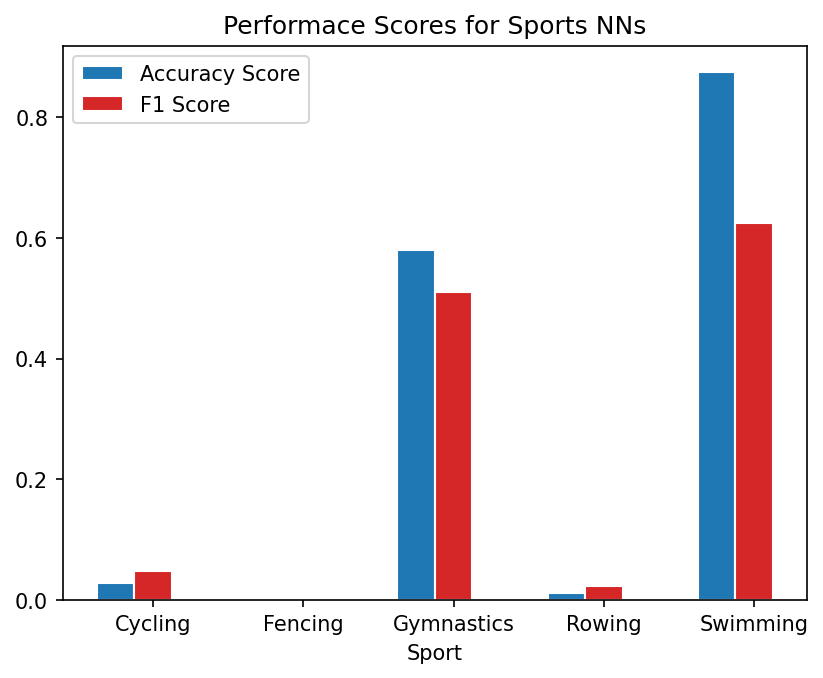

In [113]:
# grouped bar chart for displaying acccuray and f scores for classes of the sports NN
labels_sport = np.unique(df_sports_predictions["test_labels"])

f_score_sport = f1_score(df_sports_predictions["test_labels"],df_sports_predictions["predicted_labels"], average=None)
sport_f1 = pd.DataFrame({"correct_label":labels_sport, "f1_score":f_score_sport})

total_counts = df_sports_predictions.groupby('test_labels').size()
correct_counts = df_sports_predictions[df_sports_predictions['test_labels'] == df_sports_predictions['predicted_labels']].groupby("test_labels").size()

# Compute the percentage of correct predictions
accuracy = (correct_counts / total_counts).fillna(0).reset_index()
accuracy.columns = ['correct_label', 'accuracy_score']

df_scores =  pd.merge(accuracy, sport_f1, on='correct_label', how='inner')

print(df_scores)

barWidth = 0.25
bar_accuray = df_scores["accuracy_score"]
bar_f1 = df_scores["f1_score"]

r1 = np.arange(len(bar_accuray))
r2 = r1 + barWidth

fig, ax = plt.subplots(dpi=150)
ax.bar(r1, bar_accuray, color='tab:blue', width=barWidth, edgecolor='white', label='Accuracy Score')
ax.bar(r2, bar_f1, color='tab:red', width=barWidth, edgecolor='white', label='F1 Score')


ax.set_title("Performace Scores for Sports NNs")

ax.set_xlabel('Sport')
ax.set_xticks(r1 + barWidth)
ax.set_xticklabels(df_scores["correct_label"])

# Legend and show
ax.legend()
plt.show()

  correct_label  accuracy_score  f1_score
0         Field        0.680266   0.74646
1          Jump        0.017087   0.02722
2          Long        0.428763   0.46165
3           Mid        0.015064   0.02714
4         Short        0.770378   0.59968


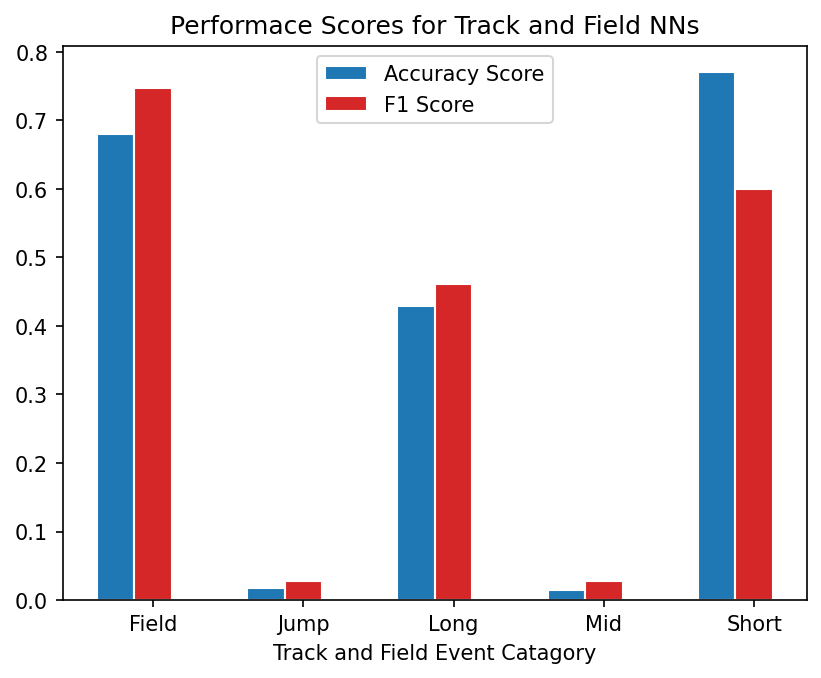

In [114]:
# grouped bar chart for displaying acccuray and f scores for classes of the atheletics NN
labels_athletics = np.unique(df_athletics_predictions["test_labels"])

f_score_athletics = f1_score(df_athletics_predictions["test_labels"],df_athletics_predictions["predicted_labels"], average=None)
athletics_f1 = pd.DataFrame({"correct_label":labels_athletics, "f1_score":f_score_athletics})

total_counts = df_athletics_predictions.groupby('test_labels').size()
correct_counts = df_athletics_predictions[df_athletics_predictions['test_labels'] == df_athletics_predictions['predicted_labels']].groupby("test_labels").size()

# Compute the percentage of correct predictions
accuracy = (correct_counts / total_counts).fillna(0).reset_index()
accuracy.columns = ['correct_label', 'accuracy_score']

df_scores =  pd.merge(accuracy, athletics_f1, on='correct_label', how='inner')


print(df_scoresA)

barWidth = 0.25
bar_accuray = df_scores["accuracy_score"]
bar_f1 = df_scores["f1_score"]

r1 = np.arange(len(bar_accuray))
r2 = r1 + barWidth

fig, ax = plt.subplots(dpi=150)
ax.bar(r1, bar_accuray, color='tab:blue', width=barWidth, edgecolor='white', label='Accuracy Score')
ax.bar(r2, bar_f1, color='tab:red', width=barWidth, edgecolor='white', label='F1 Score')

ax.set_title("Performace Scores for Track and Field NNs")

ax.set_xlabel('Track and Field Event Catagory')
ax.set_xticks(r1 + barWidth)
ax.set_xticklabels(df_scores["correct_label"])

# Legend and show
ax.legend()
plt.show()

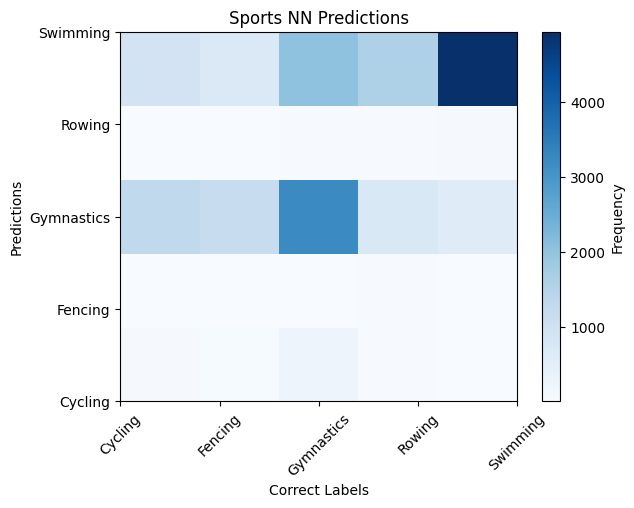

In [120]:
# predicted labels heatmap sports NN
sorted_labels = np.sort(df_sports_predictions["test_labels"].unique())

index_dict = {label: i for i, label in enumerate(sorted_labels)}

df_sports_predictions["labels_indexed"] = df_sports_predictions["test_labels"].map(index_dict)
df_sports_predictions["predictions_indexed"] = df_sports_predictions["predicted_labels"].map(index_dict)

plt.hist2d(df_sports_predictions["labels_indexed"], df_sports_predictions["predictions_indexed"], bins=5, cmap=plt.cm.Blues, density=False)


plt.xticks(ticks=np.arange(len(sorted_labels)), labels=sorted_labels, rotation=45)
plt.yticks(ticks=np.arange(len(sorted_labels)), labels=sorted_labels)

# Add labels and title
plt.xlabel('Correct Labels')
plt.ylabel('Predictions')

plt.title("Sports NN Predictions")

# Add a colorbar to show the frequency scale
plt.colorbar(label='Frequency')

# Show the plot
plt.show()

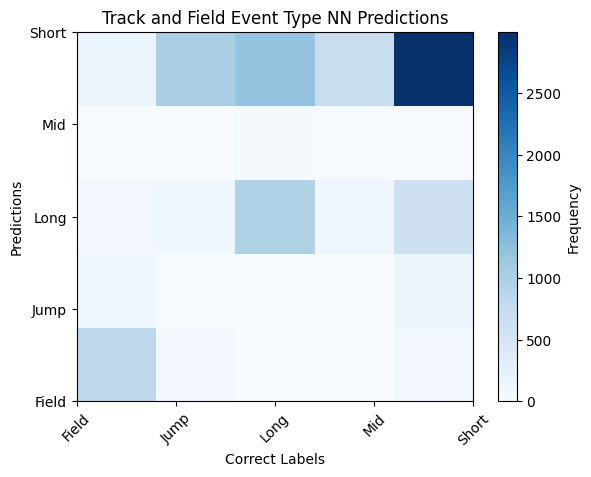

In [121]:
# predicted labels heatmap athletics NN
sorted_labels = np.sort(df_athletics_predictions["test_labels"].unique())

index_dict = {label: i for i, label in enumerate(sorted_labels)}

df_athletics_predictions["labels_indexed"] = df_athletics_predictions["test_labels"].map(index_dict)
df_athletics_predictions["predictions_indexed"] = df_athletics_predictions["predicted_labels"].map(index_dict)

plt.hist2d(df_athletics_predictions["labels_indexed"], df_athletics_predictions["predictions_indexed"], bins=5, cmap=plt.cm.Blues, density=False)


plt.xticks(ticks=np.arange(len(sorted_labels)), labels=sorted_labels, rotation=45)
plt.yticks(ticks=np.arange(len(sorted_labels)), labels=sorted_labels)

# Add labels and title
plt.xlabel('Correct Labels')
plt.ylabel('Predictions')

plt.title("Track and Field Event Type NN Predictions")

# Add a colorbar to show the frequency scale
plt.colorbar(label='Frequency')

# Show the plot
plt.show()

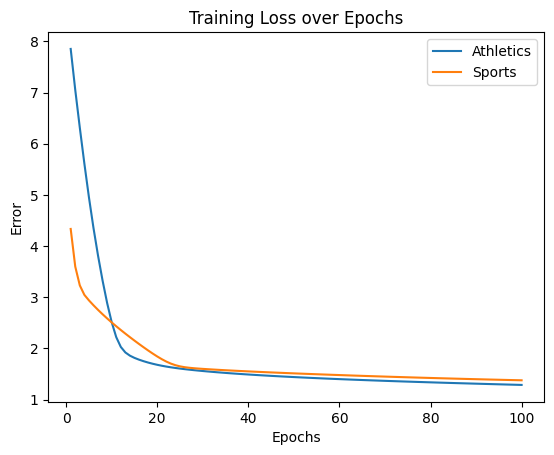

In [122]:
# training loss for NNs
df_sports_loss = pd.read_csv("R_nn/nn_outputs/sports_errors.csv", index_col=0)
df_athletics_loss = pd.read_csv("R_nn/nn_outputs/athletics_errors.csv", index_col=0)

# Plot the first line
plt.plot(df_athletics_loss["epoch_range"], df_athletics_loss["errors"], label='Athletics')

# Plot the second line
plt.plot(df_sports_loss["epoch_range"], df_sports_loss["errors"], label='Sports')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training Loss over Epochs')


# Add a legend
plt.legend()

# Show the plot
plt.show()